In [3]:
import rasterio
from rasterio.plot import show
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# read csv with class counts for each country
mimer = '/mimer/NOBACKUP/groups/globalpoverty1/albin_and_albin'
csv_class_dist = mimer + '/other/class_distribution_country_esri.csv'
df_country_class_count = pd.read_csv(csv_class_dist, index_col=0)
df_country_class_count

,c1:Water,c2:Trees,c3:Flooded Vegetation,c4:Crops,c5:Built Area,c6:Bare Ground,c7:Snow/Ice,c8:Clouds,c9:Rangeland,'c10:Very low density rural','c11: Low density rural','c12: Rural cluster','c13:Suburban','c14: Semi-Dense Urban','c13: Dense Urban','c14: Urban Center'
country,,,,,,,,,,,,,,,,
Seychelles,4544670,760859,49352,183,0,22068,91,4760,374948,10984,18481,22290,109071,0,82243,0
SaoTomeandPrincipe,2378025,7121616,1482,978,0,4646,0,1184909,28036,12434,24591,14417,77255,0,6936,143675
Mauritius,3279913,5967136,14053,6368650,0,1493,1,275546,1927997,108096,402213,45019,920943,273770,485230,929940
Comoros,3353671,8468402,10079,54892,0,50390,0,119300,2230807,41408,95464,97018,92067,178445,28264,179793
CapeVerde,11651186,57228,0,45513,0,5295593,0,0,26409699,61153,105867,79810,51704,141395,54784,46068
Gambia,9544116,14949295,7229480,22895342,0,457131,0,0,46192324,297833,623892,642273,822963,225498,468448,1651405
Swaziland,900534,69598543,4681,26673609,0,40649,0,0,85105596,675412,5678841,1093826,1184332,558666,181748,303563
Djibouti,5145715,22838,8321,346682,0,49902841,16952,0,167534985,375179,26044,28342,61421,2149,96984,431547
Rwanda,16720688,45138153,2688186,73484175,0,74658,5,2014700,84984321,264901,2216386,117850,21217291,361364,2363091,2354231


In [7]:
fold_1 = ['Algeria', 'Niger', 'Mauritania', 'Mozambique', 'CentralAfricanRepublic', 'Zimbabwe', 'Guinea', 'Malawi', 'Togo']
fold_2 = ['DemocraticRepublicoftheCongo', 'Angola', 'Egypt', 'Zambia', 'Madagascar', 'Congo', 'Ghana', 'Eritrea', 'Guinea-Bissau']
fold_3 = ['Sudan', 'Mali', 'UnitedRepublicofTanzania', 'Morocco', 'WesternSahara', 'Botswana', 'CotedIvoire', 'Uganda', 'Benin', 'Lesotho']
fold_4 = ['Libya', 'SouthAfrica', 'Nigeria', 'SouthSudan', 'Kenya', 'BurkinaFaso', 'Senegal', 'Liberia', 'EquatorialGuinea']
fold_5 = ['Chad', 'Ethiopia', 'Namibia', 'Somalia', 'Cameroon', 'Gabon', 'Tunisia', 'SierraLeone', 'Burundi']

countries =  fold_1 + fold_2 + fold_3 + fold_4 + fold_5

In [8]:
# sum together class counts of all countries and normalize
training_fold_class_count = np.zeros((16))
for country in countries:
    country_class_count = df_country_class_count.loc[[country]].iloc[0].to_numpy()
    training_fold_class_count = np.add(training_fold_class_count, country_class_count)  # add to total

training_fold_class_dist = training_fold_class_count / training_fold_class_count.sum()

### ESRI + FullSMOD

In [9]:
class_labels = ['Water', 'Tree', 'Flooded Vegetation', 
                'Crops', 'Built Area', 'Bare Ground', 'Snow / Ice', 'Clouds',
                'Rangeland', 'Very low density rural', 'Low density rural', 
                'Rural cluster', 'Suburban', 'Semi-Dense Urban', 
                'Dense Urban', 'Urban Center']
dist_class = [(class_labels[i], str(round(training_fold_class_dist[i]*100, 3)) + ' %') for i in range(16)] 
dist_class

[('Water', '1.168 %'),
 ('Tree', '25.535 %'),
 ('Flooded Vegetation', '0.273 %'),
 ('Crops', '3.414 %'),
 ('Built Area', '0.0 %'),
 ('Bare Ground', '24.285 %'),
 ('Snow / Ice', '0.0 %'),
 ('Clouds', '0.022 %'),
 ('Rangeland', '44.56 %'),
 ('Very low density rural', '0.056 %'),
 ('Low density rural', '0.141 %'),
 ('Rural cluster', '0.066 %'),
 ('Suburban', '0.185 %'),
 ('Semi-Dense Urban', '0.049 %'),
 ('Dense Urban', '0.071 %'),
 ('Urban Center', '0.174 %')]

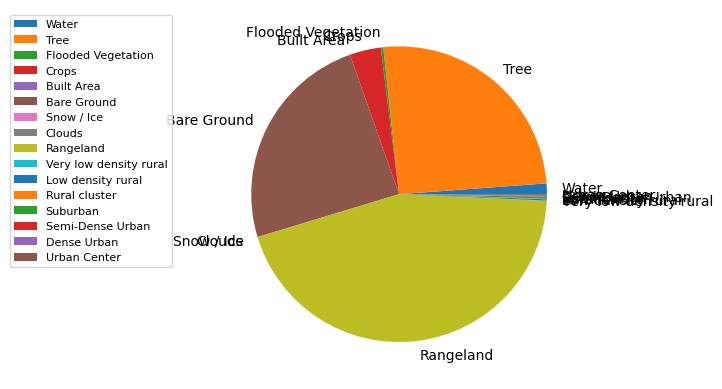

In [13]:
patches, _ = plt.pie(training_fold_class_dist, labels=class_labels)
plt.legend(patches, class_labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.show()

### ESRI + Rural&Urban

In [14]:
training_fold_class_dist_remapped = np.zeros((8))
training_fold_class_dist_remapped[0:4] = training_fold_class_dist[0:4]  # water, tree, flooded veg., crops
training_fold_class_dist_remapped[4] = training_fold_class_dist[5]  # bare
training_fold_class_dist_remapped[5] = training_fold_class_dist[8]  # rangeland
training_fold_class_dist_remapped[6] = training_fold_class_dist[9:12].sum()  # rural
training_fold_class_dist_remapped[7] = training_fold_class_dist[12:16].sum()  # urban

In [22]:
class_labels_remapped = ['Water', 'Tree', 'Flooded Vegetation', 
                'Crops', 'Bare Ground', 'Rangeland', 'Rural', 'Urban']
dist_class = [(class_labels_remapped[i], str(round(training_fold_class_dist_remapped[i]*100, 3)) + ' %') for i in range(8)] 
dist_class

[('Water', '1.168 %'),
 ('Tree', '25.535 %'),
 ('Flooded Vegetation', '0.273 %'),
 ('Crops', '3.414 %'),
 ('Bare Ground', '24.285 %'),
 ('Rangeland', '44.56 %'),
 ('Rural', '0.263 %'),
 ('Urban', '0.479 %')]

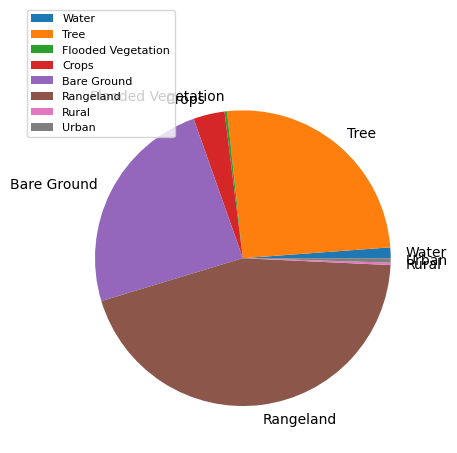

In [23]:
patches, _ = plt.pie(training_fold_class_dist_remapped, labels=class_labels_remapped)
plt.legend(patches, class_labels_remapped, loc='center left', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.show()

In [7]:
dist_class = [training_fold_class_dist[i] for i in range(16)] 
dist_class

[('Water', 0.011746360063976738),
 ('Tree', 0.25716889262680814),
 ('Flooded Vegetation', 0.0027543664754177883),
 ('Crops', 0.03449433723108066),
 ('Built Area', 0.0),
 ('Bare Ground', 0.2387842560966871),
 ('Snow / Ice', 1.0973873954064562e-06),
 ('Clouds', 0.0002189201696379381),
 ('Rangeland', 0.4473446706374897),
 ('Very low density rural', 0.0005666910398173863),
 ('Low density rural', 0.0014247474361213208),
 ('Rural cluster', 0.0006617840679181764),
 ('Suburban', 0.001868795897012423),
 ('Semi-Dense Urban', 0.0004935309861173255),
 ('Dense Urban', 0.0007163784923461719),
 ('Urban Center', 0.0017551713921736798)]

In [12]:
1-sum(training_fold_class_dist[12:16])

0.9951661232323504

In [19]:
-np.log(np.clip(sum(training_fold_class_dist[12:16]), 1e-5, 1-1e-5))

5.3321064898579

In [24]:
1 / sum(training_fold_class_dist[12:16])

206.8732919904855